In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Считываем датасет
df = pd.read_csv('./bank1.csv', sep=',')
# df[df['age']==42]
# df[df['balance']==284]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Стандартный синтаксис создания графика

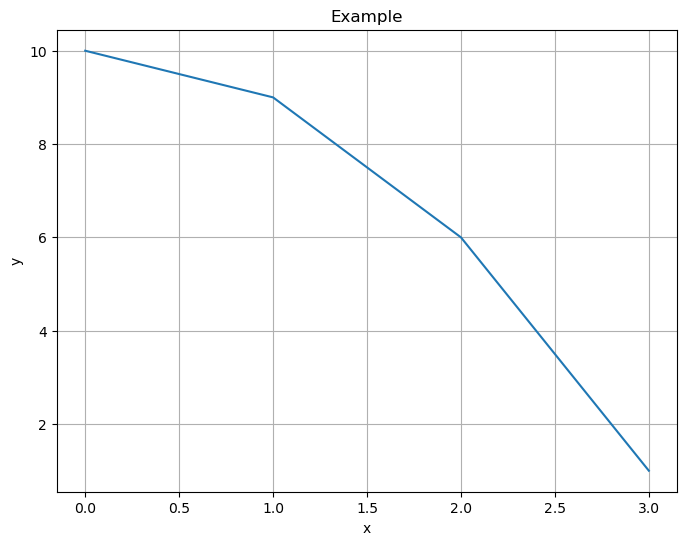

In [4]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

1.	title. Заголовок графика
2.	y label/x label. Именования осей х и у
3.	legend. Легенда к графикам
4.	major/minor ticks. Основной и дополнительный масштаб осей
5.	major/minor grid. Основная и дополнительная сетка на графике

In [22]:
df['month'] = df['month'].replace(df['month'].unique(), [5,6,7,8,10,11,12,1,2,3,4,9])
def con(s):
    if s == 'yes':
        x=1
    else:
        x=0
    return x
df['convert'] = df['deposit'].apply(con)                                              

## Виды графиков

### Линейный график

#### Mathplotlib

In [6]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values('month')
data.head()

,month,count
0,1,344
1,2,776
2,3,276
3,4,923
4,5,2824


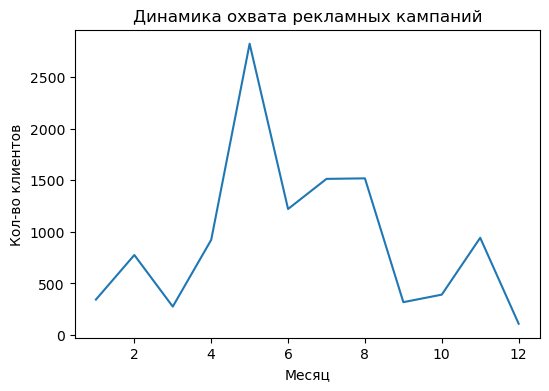

In [7]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

#### Seaborn

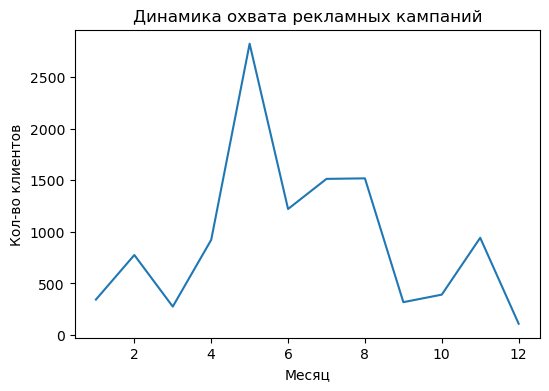

In [8]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

### Гистограмма

#### Matplotlib

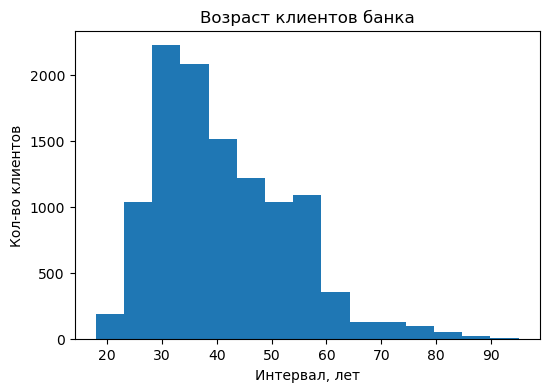

In [12]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

#### Seaborn

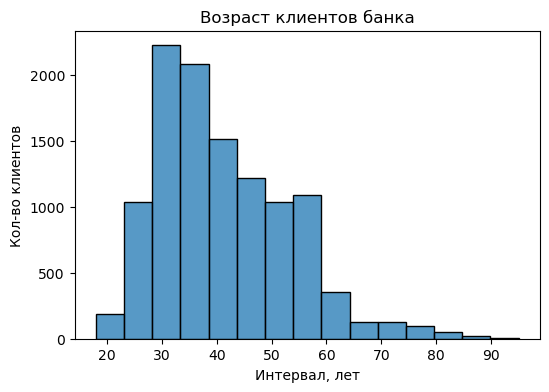

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

### Диаграмма рассеяния

In [23]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


#### Matplotlib

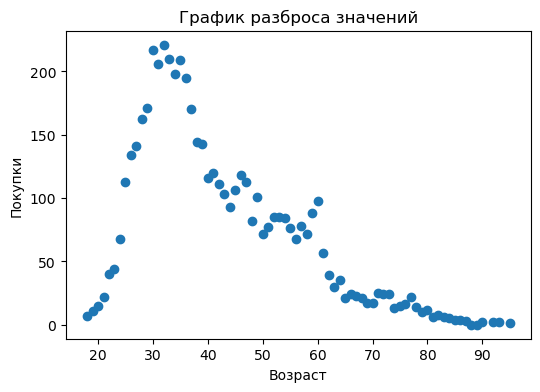

In [24]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

#### Seaborn

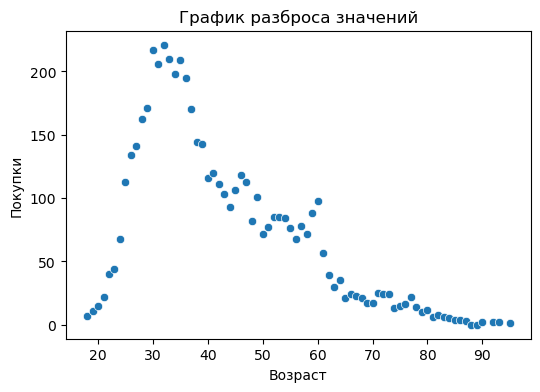

In [25]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

### Столбчатые диаграммы

In [27]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,management,2566
1,blue-collar,1944
2,technician,1823
3,admin.,1334
4,services,923


#### Matplotlib

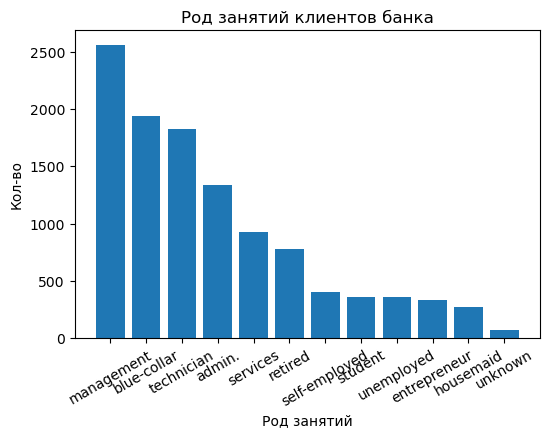

In [34]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

#### Seaborn

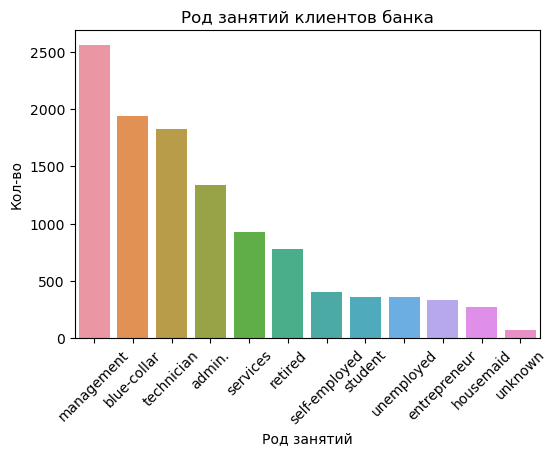

In [35]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=45);  # угол подписей

### Многорядовые столбчатые диаграммы

In [36]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
4,management,1265,1301
1,blue-collar,1236,708
9,technician,983,840
0,admin.,703,631
7,services,554,369


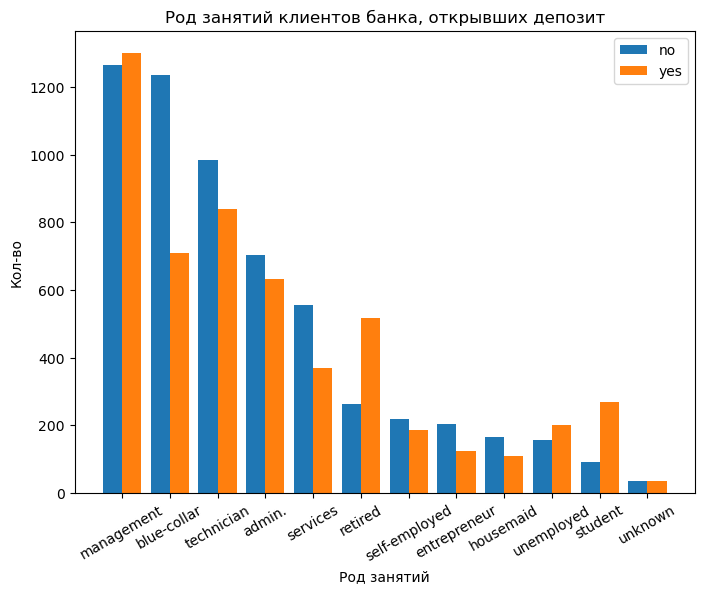

In [39]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

### Сложенная столбчатая диаграмма

In [40]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.635802,0.364198
2,entrepreneur,0.625000,0.375000
3,housemaid,0.602190,0.397810
7,services,0.600217,0.399783
9,technician,0.539221,0.460779


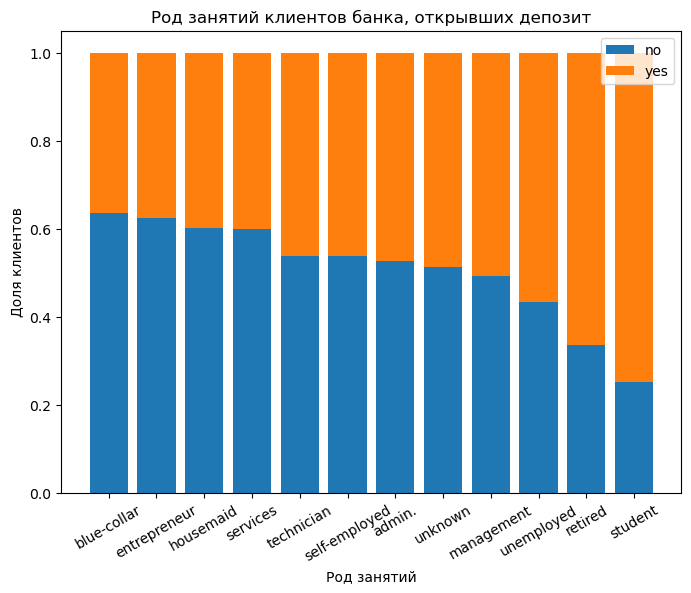

In [41]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

### Ящики с усами

In [44]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

0    1042
1    1467
2    1389
3     579
4     673
Name: duration, dtype: int64

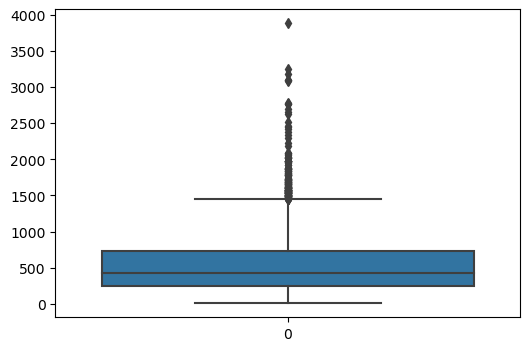

In [45]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

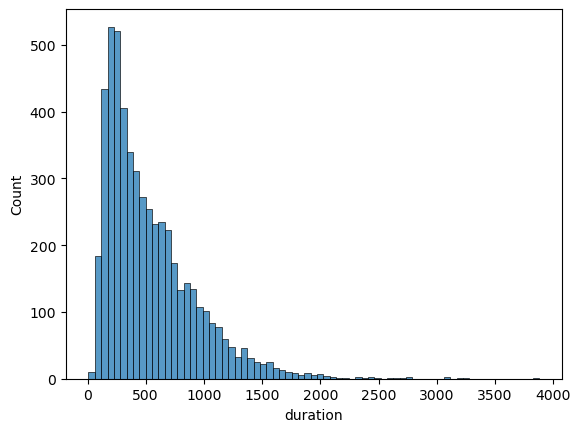

In [46]:
sns.histplot(x=data1);

#### Matplotlib

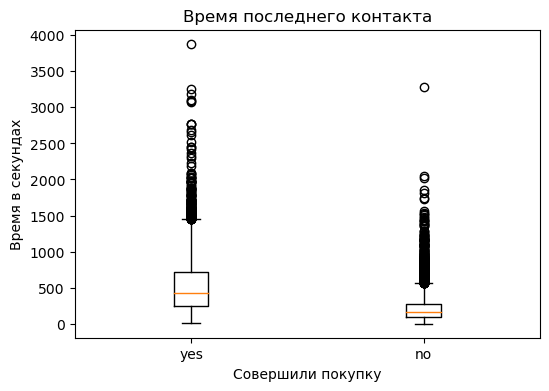

In [47]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

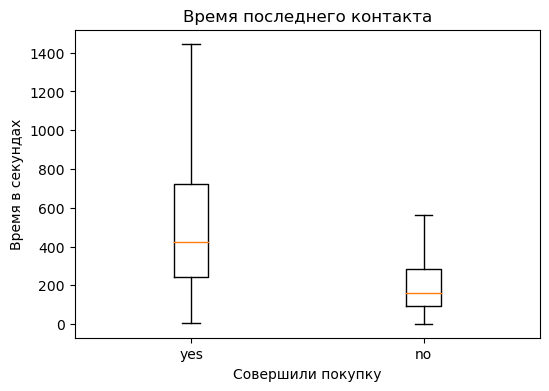

In [48]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

#### Seaborn

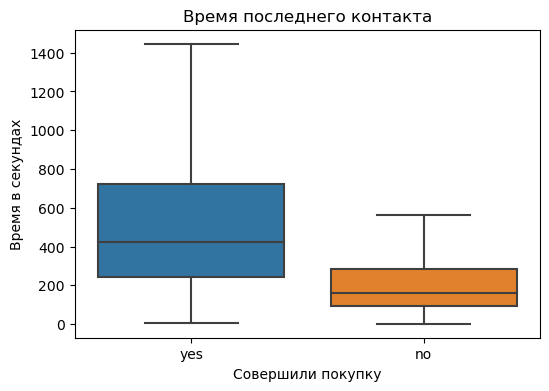

In [49]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

### Круговая диаграмма

In [50]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     5873
yes    5289
Name: convert, dtype: int64

#### Matplotlib

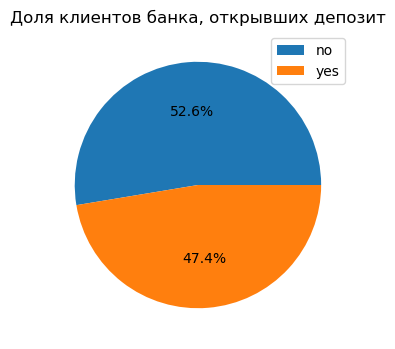

In [51]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);